In [1]:
from __future__ import division
import os
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
#import plot_mpI2
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.stats import lognorm
from scipy import stats


%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
kh_files = []
# this is the path to where you store all the GW realizations
#for i in os.listdir('../../rusty_data/KH13_Reg/29dex'):
for i in os.listdir('../../rusty_data/KH13_Reg/29_dex'):
    if i.endswith('.txt'):
        kh_files.append(i)

In [3]:
"""this is the path to where you store all the GW realizations"""

mm_files = []
for i in os.listdir('../../rusty_data/MM13_Reg/34_dex'):
    if i.endswith('.txt'):
        mm_files.append(i)

In [4]:
hr_files = []
# this is the path to where you store all the GW realizations
for i in os.listdir('../../rusty_data/HR04_Reg/30_dex/'):
    if i.endswith('.txt'):
        hr_files.append(i)

In [5]:
no_of_skies = len(kh_files)
kh_source = []
kh_stall = []

# remember to update the path here to the one with all your realizations
for jj in range(no_of_skies):
    filename = kh_files[jj]
    sim_sky = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/" + str(filename))  
    
    ex = sim_sky[:,0] #phi, add pi to this for healpix maps
    kh_source.append(ex.size) # number of galaxies in file
    kh_stall.append(sim_sky[0][18])

In [6]:
no_of_skies = len(mm_files)
mm_source = []
mm_stall = []

# remember to update the path here to the one with all your realizations
for jj in range(no_of_skies):
    filename = mm_files[jj]
    sim_sky = np.genfromtxt("../../rusty_data/MM13_Reg/34_dex/" + str(filename))  
    
    ex = sim_sky[:,0] #phi, add pi to this for healpix maps
    mm_source.append(ex.size) # number of galaxies in file
    mm_stall.append(sim_sky[0][18])

In [7]:
no_of_skies = len(hr_files)
hr_source = []
hr_stall = []

# remember to update the path here to the one with all your realizations
for jj in range(no_of_skies):
    filename = hr_files[jj]
    sim_sky = np.genfromtxt("../../rusty_data/HR04_Reg/30_dex/" + str(filename))  
    
    ex = sim_sky[:,0] #phi, add pi to this for healpix maps
    hr_source.append(ex.size) # number of galaxies in file
    hr_stall.append(sim_sky[0][18])

In [9]:
kh_weightsSt =  np.ones_like(kh_stall)/len(kh_stall)
mm_weightsSt =  np.ones_like(mm_stall)/len(mm_stall)
hr_weightsSt =  np.ones_like(hr_stall)/len(hr_stall)

In [10]:
kh_weightsG = np.ones_like(kh_source)/len(kh_source)
mm_weightsG = np.ones_like(mm_source)/len(mm_source)
hr_weightsG = np.ones_like(hr_source)/len(hr_source)

In [ ]:
#plot all relations against each other
#sources
bin_size = 1; min_edge = 0; max_edge = 600
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(kh_stall, bin_list, weights = kh_weightsSt, alpha =0.8, align='left')
plt.hist(mm_stall, bin_list, weights = mm_weightsSt, alpha =0.8, align='left')
plt.hist(hr_stall, bin_list, weights = hr_weightsSt, alpha =0.8, align='left')

plt.ylabel("Probability")
plt.xlabel("Number of Stalled Binaries per realization")
plt.tight_layout()

plt.savefig("plots_comparison/no_stalled_all.pdf")

In [ ]:
#plot all relations against each other
#stalled

bin_size = 1; min_edge = 0; max_edge = 600
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(kh_source, bin_list, weights = kh_weightsG, alpha =0.8, align='left')
plt.hist(mm_source, bin_list, weights = mm_weightsG, alpha =0.8, align='left')
plt.hist(hr_source, bin_list, weights = hr_weightsG, alpha =0.8, align='left')

plt.ylabel("Probability")
plt.xlabel("Number of Sources per realization")
plt.tight_layout()

plt.savefig("plots_comparison/no_sources_all.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


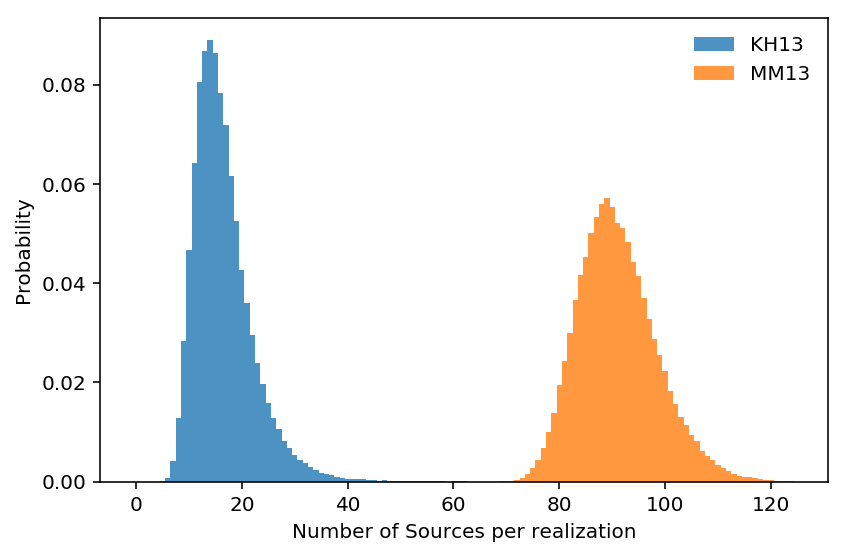

In [17]:
#plot only kh13 and mm13 relations against each other 
#sources

fig, ax = plt.subplots() 

bin_size = 1; min_edge = 0; max_edge = 125
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(kh_source, bin_list, weights = kh_weightsG, alpha =0.8, align='left', label = "KH13")
plt.hist(mm_source, bin_list, weights = mm_weightsG, alpha =0.8, align='left', label = "MM13")

plt.ylabel("Probability")
plt.xlabel("Number of Sources per realization")

ax.legend(frameon=False)

plt.tight_layout()

plt.savefig("plots_comparison/no_sources_kh13_mm13.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


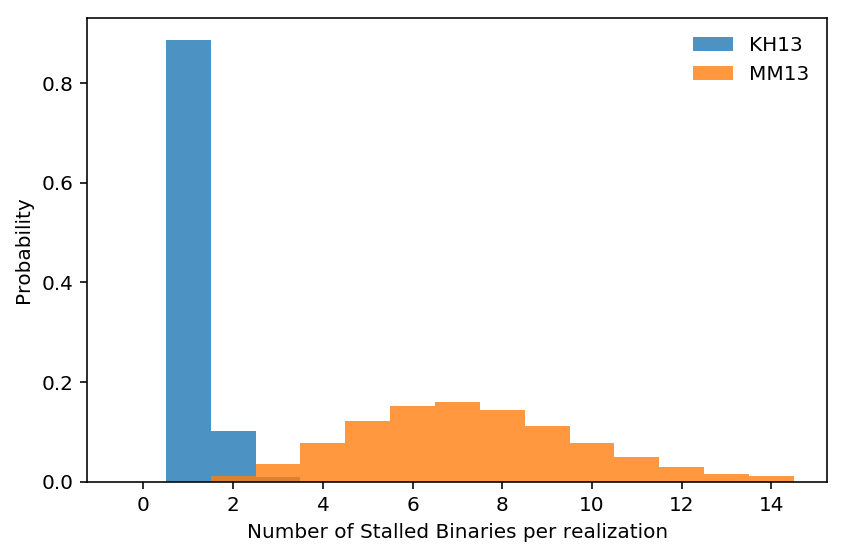

In [18]:
#plot only kh13 and mm13 relations against each other 
#sstalled

bin_size = 1; min_edge = 0; max_edge = 15
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

fig, ax = plt.subplots() 

plt.hist(kh_stall, bin_list, weights = kh_weightsSt, alpha =0.8, align='left', label = "KH13")
plt.hist(mm_stall, bin_list, weights = mm_weightsSt, alpha =0.8, align='left', label = "MM13")

ax.legend(frameon=False)

plt.ylabel("Probability")
plt.xlabel("Number of Stalled Binaries per realization")
plt.tight_layout()
plt.savefig("plots_comparison/no_stalled_kh13_mm13.pdf")

In [19]:
(mu_kh, sigma_kh) = norm.fit(kh_stall)
(mu_mm, sigma_mm) = norm.fit(mm_stall)

In [20]:
print(mu_kh, sigma_kh)
print(mu_mm, sigma_mm)

1.1267771792402912 0.3788749367847872
7.297615152819629 2.509103596061141
